# Sentiment Analysis on Cornavirus after outbreak and before outbreak

## Problem Statement

> Analyse people's sentiment before outbreak of Cornavirus and after outbreak of cornavirus.Now We are taking data one month prior to the corona outbreak in India and one month after the outbreak here and comparing people's emotions

In [1]:

import string
from collections import Counter
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import GetOldTweets3 as got
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
G:\DOWNLOADS\Programs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Retrieving Tweets Before Corona virus Outbreak


Now i'm going to scrap tweets for before outbreak of coronavirus .

In [2]:
def get_tweets(keyword,start,end,mxm):
    tweet_criteria=got.manager.TweetCriteria().setQuerySearch(keyword).setSince(start).setUntil(end)\
    .setMaxTweets(mxm)
    tweets=got.manager.TweetManager.getTweets(tweet_criteria)
    text=[[tweet.text] for tweet in tweets]
    return text

In [3]:
before=get_tweets('corona virus', '2020-01-01','2020-02-28',1000)
before

[['California Is Monitoring at Least 8,400 People for Coronavirus, Governor Says '],
 ['【Responses to New Coronavirus Infections】 http://systemtoyo.jugem.jp/?eid=55 #jugem_blog'],
 ['Just heard that all statements about the Coronavirus are going to be screened by the administration. So starts what trumpp wants to do ... control information to the public. Wants his own propaganda'],
 ['Se o Coronavirus esta derrubando a bolsa no Brasil segundo os "especialistas", posso dizer que são forças inversamentes proporcionais entao, logo, Bozo e Guedes, para derrotar o virus basta melhorar nossos índices econômicos e consequentemente a confiança np País. Se virem!'],
 ['#Coronavirus #COVID19 It’s going global @TheEconomist https://twitter.com/Finanzas_Times/status/1227034596400881664'],
 ['Nun wird sich die völlige Unfähigkeit Merkels angesichts der Flüchtlingsströme, des Coronavirus, der bevorstehenden Rezession u.v.w. offenbaren. Wer dann glaubt, auf linksgrünen Sozialismus setzen zu müssen, b

### Cleaning the text_tokenization/stopword removal/punctuations

In [4]:
before_text=''
for i in range(0,len(before)):
    before_text=before_text+'. '+before[i][0]

# converting to lowercase    
lower=before_text.lower()

# Removing punctuations
cleaned_text=lower.translate(str.maketrans('','',string.punctuation))

tokens=word_tokenize(cleaned_text,'english')
len(tokens)

20516

In [13]:
# Removing Stop Words
words = []

for word in tokens:
    if word not in stopwords.words('english'):
        words.append(word)

In [14]:
word_lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]
len(word_lemma)

15166

In [15]:
lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]
len(lemma)

15166

### Emotions list for Before Covid Outbreak

In [18]:
emotion_list = []
with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = clear_line.split(":")
        if word in final_word:
            emotion_list.append(word)
            
            
word = Counter(emotion_list)
print(word)

Counter({'alone': 2, 'excited': 2, 'low': 2, 'outbreak': 1, 'solo': 1, 'affected': 1, 'appreciated': 1, 'certain': 1, 'common': 1, 'concerned': 1, 'confused': 1, 'controlled': 1, 'criticized': 1, 'curious': 1, 'determined': 1, 'encouraged': 1, 'free': 1, 'glad': 1, 'happy': 1, 'hurt': 1, 'ignored': 1, 'included': 1, 'independent': 1, 'irresponsible': 1, 'lost': 1, 'macho': 1, 'mad': 1, 'nervous': 1, 'organized': 1, 'pathetic': 1, 'proud': 1, 'rated': 1, 'released': 1, 'sad': 1, 'scared': 1, 'shocked': 1, 'significant': 1, 'surprised': 1, 'vulnerable': 1, 'weak': 1, 'worried': 1, 'adequate': 1, 'afraid': 1, 'arrogant': 1, 'average': 1, 'great': 1})


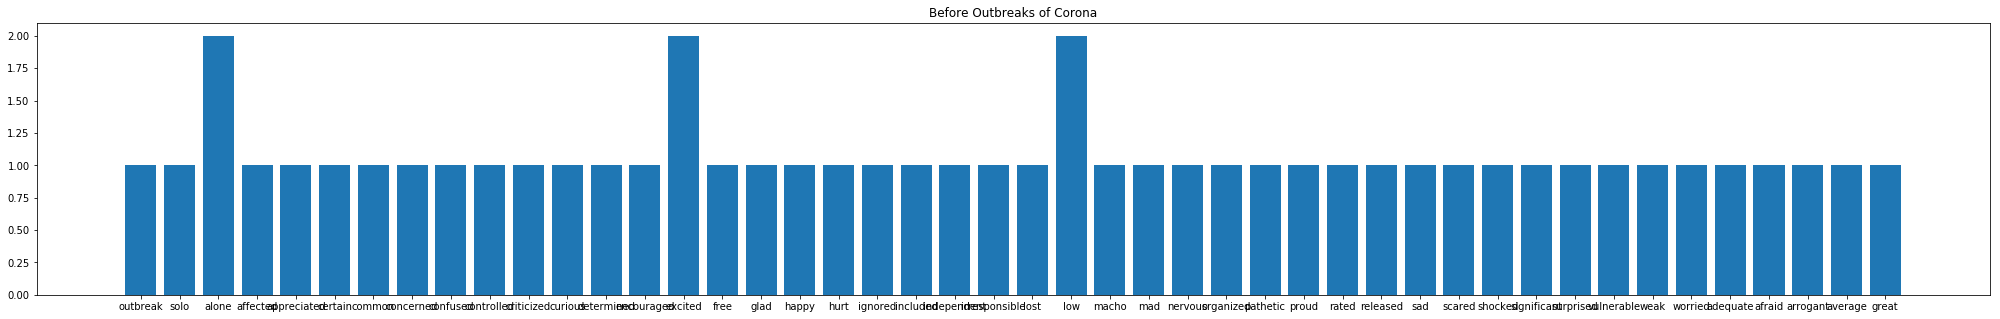

In [19]:
plt.figure(figsize=(35,5))
plt.bar(*zip(*word.items()))
plt.title("Before Outbreaks of Corona")
plt.show()

In [20]:
sentiment=SentimentIntensityAnalyzer()
sentiment.polarity_scores(cleaned_text)

{'neg': 0.106, 'neu': 0.828, 'pos': 0.065, 'compound': -1.0}

## Retrieving Tweets After Corona virus Outbreak

In [21]:
after=get_tweets('corona virus', '2020-03-20','2020-06-28',1000)
after

[["Hotel owners face rising operational costs to keep up with new coronavirus cleaning standards. While some technology platforms could trim labor costs, these offsets aren't expected to hit until tech-savvy business travel returns. "],
 ['Coronavirus, worldwide. Cases: 10,070,000 Deaths: 500,500 Recoveries: 5,450,000'],
 ['Coronavirus latest: Labour urges ministers to boost support for businesses amid lockdown s '],
 ['The Karen epidemic is worse than the Coronavirus.'],
 ['Coronavirus is not the flu. It’s worse. http://youtube.com/watch?v=FVIGhz3uwuQ&amp;feature=youtu.be'],
 ['by the way my coronavirus cure is from Catalytic Therapy of cancer - this catalytic system -sodium ascorbate+ porphyrin Co ( or vit b12) produce active oxygen which destroys cancer cells. I have researched it on isolated cancer cells and animal model.'],
 ['U.S. Sets Daily Record For New Coronavirus Cases https://www.npr.org/sections/coronavirus-live-updates/2020/06/26/883799638/u-s-sets-daily-record-for-new-co

In [22]:
after_text=''
for i in range(0,len(after)):
    after_text=after_text+'. '+after[i][0]

# converting to lowercase    
lower=after_text.lower()

# Removing punctuations
cleaned_text=lower.translate(str.maketrans('','',string.punctuation))

tokens=word_tokenize(cleaned_text,'english')
len(tokens)

21637

In [24]:
# Removing Stop Words
words = []

for word in tokens:
    if word not in stopwords.words('english'):
        words.append(word)

In [25]:
word_lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]
len(word_lemma)

16611

In [26]:
final_word =[]
for word in tokens:
    if word not in stopwords.words('english'):
        final_word.append(word)

In [27]:
len(final_word)

16611

### Emotions list for After Covid Outbreak

In [28]:
emotion_list = []
with open('emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = clear_line.split(":")
        if word in final_word:
            emotion_list.append(word)
            
            
word = Counter(emotion_list)
print(word)

Counter({'alone': 2, 'isolated': 2, 'loved': 2, 'low': 2, 'outbreak': 1, 'solo': 1, 'accused': 1, 'affected': 1, 'awkward': 1, 'certain': 1, 'common': 1, 'concerned': 1, 'confused': 1, 'cross': 1, 'crushed': 1, 'curious': 1, 'dark': 1, 'defeated': 1, 'dubious': 1, 'exposed': 1, 'flat': 1, 'forced': 1, 'free': 1, 'guilt': 1, 'guilty': 1, 'happy': 1, 'hopeful': 1, 'hurt': 1, 'ignored': 1, 'immune': 1, 'important': 1, 'included': 1, 'lost': 1, 'lucky': 1, 'needed': 1, 'organized': 1, 'overwhelmed': 1, 'pathetic': 1, 'punished': 1, 'responsible': 1, 'sad': 1, 'scared': 1, 'suffering': 1, 'understood': 1, 'abandoned': 1, 'accepted': 1, 'afraid': 1, 'average': 1, 'great': 1})


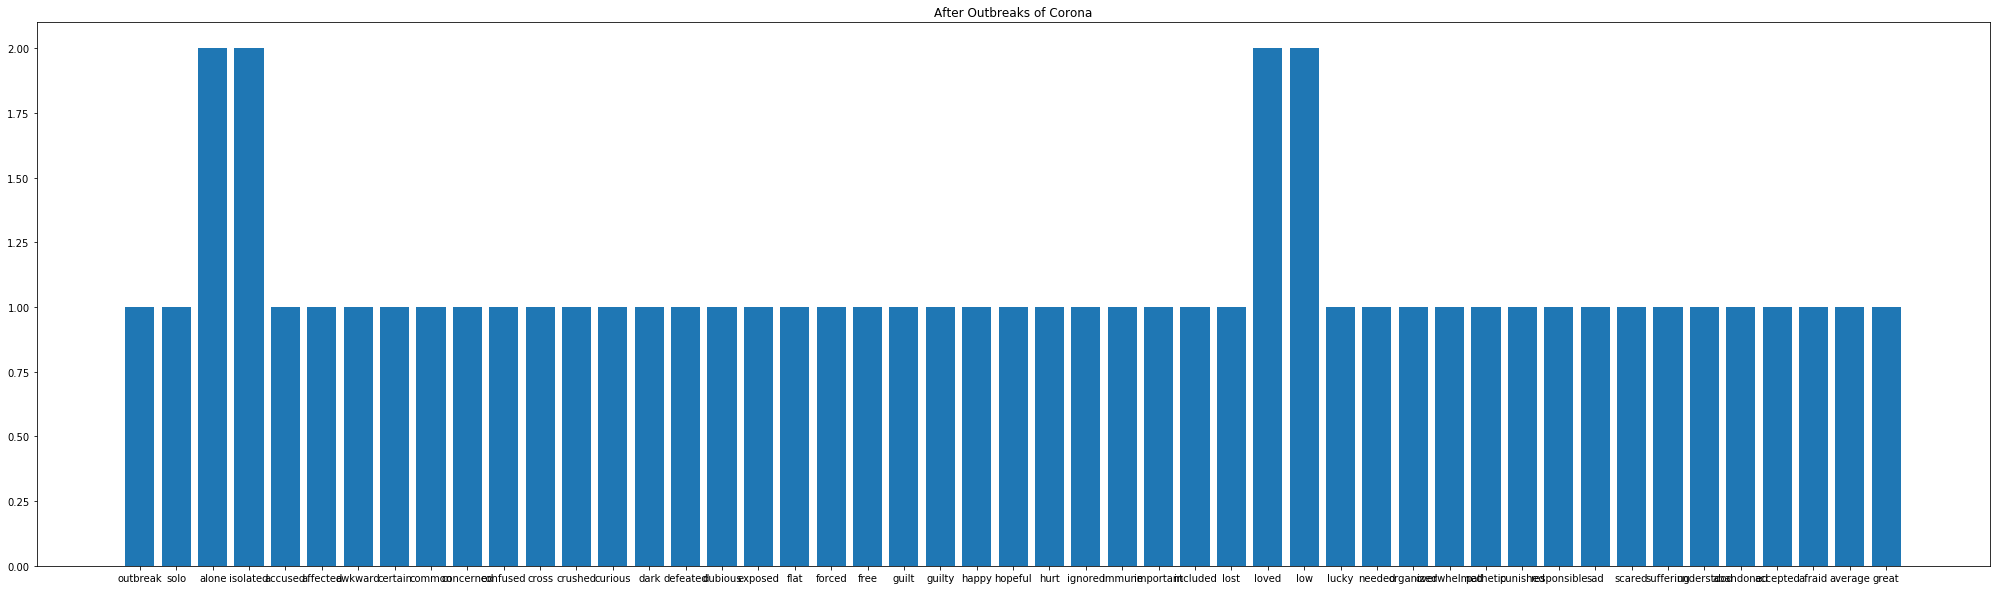

In [29]:
plt.figure(figsize=(35,10))
plt.bar(*zip(*word.items()))
plt.title("After Outbreaks of Corona")
plt.show()

### Sentiment Analysis

In [30]:
sentiment=SentimentIntensityAnalyzer()
sentiment.polarity_scores(cleaned_text)

{'neg': 0.1, 'neu': 0.839, 'pos': 0.061, 'compound': -1.0}

>We can clearly see from the two graphs that intensity of Sadness and fear,isolated has increased tremendously  .